<a href="https://colab.research.google.com/github/andrewxu13/TextAnalytics/blob/main/Week_06_Feature_Engineering_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bag of N-grams


We use sklearn CountVectorizer to create the Bag of Words

Documentation https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

We can use binary= True to see if the word appears or not, no need to count

### Uni-gram ==one word

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".","") for doc in documents]

In [ ]:
#Ngram vectorization example with count vectorizer and uni-gram first
count_vect3 = CountVectorizer(ngram_range=(1,1)) #set a range
# Build a BOW representation for the corpus
bow_rep3 = count_vect3.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect3.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for" , processed_docs[0], ": ", bow_rep3[0].toarray())
print("BoW representation for" , processed_docs[1], ": ",bow_rep3[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect3.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}
BoW representation for dog bites man :  [[1 1 0 0 1 0]]
BoW representation for man bites dog :  [[1 1 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 2 0 0 0 0]]


### Bi-gram == two words

In [ ]:
#Ngram vectorization example with count vectorizer and uni-gram first
count_vect4 = CountVectorizer(ngram_range=(2,2)) #set a range
#Build a BOW representation for the corpus
bow_rep4 = count_vect4.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect4.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for" , processed_docs[0], ": ", bow_rep4[0].toarray())
print("BoW representation for" , processed_docs[1], ": ",bow_rep4[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect4.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog bites': 2, 'bites man': 1, 'man bites': 6, 'bites dog': 0, 'dog eats': 3, 'eats meat': 5, 'man eats': 7, 'eats food': 4}
BoW representation for dog bites man :  [[0 1 1 0 0 0 0 0]]
BoW representation for man bites dog :  [[1 0 0 0 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 0 0 0 0 0]]


### tri-gram == three words

In [ ]:
#Ngram vectorization example with count vectorizer and uni-gram first
count_vect5 = CountVectorizer(ngram_range=(3,3)) #set a range
#Build a BOW representation for the corpus
bow_rep5 = count_vect5.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect5.vocabulary_)
#see the BOW rep for first 2 documents
print("BoW representation for" , processed_docs[0], ": ", bow_rep5[0].toarray())
print("BoW representation for" , processed_docs[1], ": ",bow_rep5[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect5.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog bites man': 0, 'man bites dog': 2, 'dog eats meat': 1, 'man eats food': 3}
BoW representation for dog bites man :  [[1 0 0 0]]
BoW representation for man bites dog :  [[0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 0]]


### Bag of N-grams
Let's have uni-gram. bi-gram, and tri-gram all together

In [ ]:
#Ngram vectorization example with count vectorizer and uni-gram first
count_vect5 = CountVectorizer(ngram_range=(1,3)) #set a range from 1 to 3 gram
#Build a BOW representation for the corpus
bow_rep5 = count_vect5.fit_transform(processed_docs)

#Look at the vocabulary mapping


print("Our vocabulary: ", {k: v for k, v in sorted(count_vect5.vocabulary_.items(), key=lambda item: item[1])})  #count_vect5.vocabulary_ is the dict, let's sort it

#see the BOW rep for first 2 documents
print("BoW representation for" , processed_docs[0], ": ", bow_rep5[0].toarray())
print("BoW representation for" , processed_docs[1], ": ",bow_rep5[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect5.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'bites': 0, 'bites dog': 1, 'bites man': 2, 'dog': 3, 'dog bites': 4, 'dog bites man': 5, 'dog eats': 6, 'dog eats meat': 7, 'eats': 8, 'eats food': 9, 'eats meat': 10, 'food': 11, 'man': 12, 'man bites': 13, 'man bites dog': 14, 'man eats': 15, 'man eats food': 16, 'meat': 17}
BoW representation for dog bites man :  [[1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0]]
BoW representation for man bites dog :  [[1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


## TF-IDF

YOu can flex your Python to calculate TF, IDF, then TF-IDF, but you don't have to. Sklearn have it covered

Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

L2 normalization is a way to make the vector smaller to save computing power but still retain enough information

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Tfidf vectorizer create transform the data into vector, and then create tf-idf for each document

tfidf = TfidfVectorizer() #norm =l2
bow_rep_tfidf = tfidf.fit_transform(processed_docs)


In [ ]:
bow_rep_tfidf.todense()

matrix([[0.65782931, 0.53256952, 0.        , 0.        , 0.53256952,
         0.        ],
        [0.65782931, 0.53256952, 0.        , 0.        , 0.53256952,
         0.        ],
        [0.        , 0.44809973, 0.55349232, 0.        , 0.        ,
         0.70203482],
        [0.        , 0.        , 0.55349232, 0.70203482, 0.44809973,
         0.        ]])

In [ ]:
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

In [ ]:
#get term frequency via Document Term Matrix. Row = Document. Column = Term. Matrix = Table
tf_dtm = tfidf.fit_transform(processed_docs).todense() #toarray returns an ndarray; todense returns a matrix.
tokens = tfidf.get_feature_names_out()
term_frequency = pd.DataFrame(data=tf_dtm,
                              columns=tokens)
print(term_frequency)

      bites      dog      eats      food      man      meat
0  0.657829  0.53257  0.000000  0.000000  0.53257  0.000000
1  0.657829  0.53257  0.000000  0.000000  0.53257  0.000000
2  0.000000  0.44810  0.553492  0.000000  0.00000  0.702035
3  0.000000  0.00000  0.553492  0.702035  0.44810  0.000000


In [ ]:
#IDF for all words in the vocabulary
print("IDF for all words in the vocabulary",tfidf.idf_)


IDF for all words in the vocabulary [1.51082562 1.22314355 1.51082562 1.91629073 1.22314355 1.91629073]


In [ ]:
tfidf.vocabulary_ #All words in the vocabulary.

{'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}

In [ ]:
#TFIDF representation for all documents in our corpus
for i in range(len(processed_docs)):
 print("document: ",processed_docs[i])
 print("has a TFIDF vector representation:",bow_rep_tfidf.toarray()[i])

#order is based on the get_feature names


document:  dog bites man
has a TFIDF vector representation: [0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
document:  man bites dog
has a TFIDF vector representation: [0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
document:  dog eats meat
has a TFIDF vector representation: [0.         0.44809973 0.55349232 0.         0.         0.70203482]
document:  man eats food
has a TFIDF vector representation: [0.         0.         0.55349232 0.70203482 0.44809973 0.        ]


In [ ]:
temp = tfidf.transform(["dog and man are friends."])
print("Tfidf representation for 'dog and man are friends':\n", temp.toarray())

Tfidf representation for 'dog and man are friends':
 [[0.         0.70710678 0.         0.         0.70710678 0.        ]]


## Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
corpus = ['The sun is the largest celestial body in the solar system',
          'The solar system consists of the sun and eight revolving planets',
          'Ra was the Egyptian Sun God',
          'The Pyramids were the pinnacle of Egyptian architecture',
          'The quick brown fox jumps over the lazy dog']

In [ ]:
tfidf2 = TfidfVectorizer()
tfidf2matrix = tfidf2.fit_transform(corpus)

# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf2matrix, tfidf2matrix) #compare each doc with the entire corpus.
print(cosine_sim)

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]


In [ ]:
cosine_sim[0] #first doc

array([1.        , 0.36413198, 0.18314713, 0.18435251, 0.16336438])

In [ ]:
#if you want 1 number then just do avg
cosine_similarity(temp, bow_rep_tfidf.toarray()).mean()

0.5350107008146793

In [ ]:
temp = tfidf.transform(["dog and man are friends."])
cosine_similarity(temp, bow_rep_tfidf.toarray()) #how similar the "dog and man are friends." with the corpus

array([[0.75316704, 0.75316704, 0.31685436, 0.31685436]])

In [ ]:
temp2 = tfidf.transform(["dog eats man"])
similar2 = cosine_similarity(temp2, bow_rep_tfidf.toarray()) #how similar the "dog eats man" with the corpus
print(similar2)
print(similar2.mean())

[[0.56726059 0.56726059 0.60274773 0.60274773]]
0.5850041623121691


In [ ]:
for i in range(len(cosine_sim)):
  print( "document position ", i ,": cosine similarity score ",cosine_sim[i].mean()) #average similarity

document position  0 : cosine similarity score  0.37899920077372284
document position  1 : cosine similarity score  0.36875148864934953
document position  2 : cosine similarity score  0.32490180416575665
document position  3 : cosine similarity score  0.34883705183556357
document position  4 : cosine similarity score  0.29652785237971474


## TF-IDF Example - News similarity

In [ ]:
# download the BBC news blob (zip files)
#the files contain 5 folders, each folder is a news category. Each news are in a text format

!gdown 1eT3uD2ihxDEt2r2GJE6HeB_uhkgzh75V

Downloading...
From: https://drive.google.com/uc?id=1eT3uD2ihxDEt2r2GJE6HeB_uhkgzh75V
To: /content/bbc.zip
100% 2.90M/2.90M [00:00<00:00, 159MB/s]


In [ ]:
import zipfile
from pathlib import Path

In [ ]:
#unzip file and put in a df with three columns: topic, heading, body
with zipfile.ZipFile('/content/bbc.zip', 'r') as zip_ref:
    topic = []
    heading = []
    body =[]
    for filename in zip_ref.namelist():
        if filename.endswith('.txt'):
            with zip_ref.open(filename) as f:
                text = f.read()
                text = text.decode("latin1").split("\n")
                indiv_heading = text[0]
                heading.append(indiv_heading)
                indiv_body = ' '.join([l.strip() for l in text[1:]]).strip()
                body.append(indiv_body)
                topic.append(Path(filename).parent.name)

news_df = pd.DataFrame({'topic': topic,'heading':heading,'body':body})
news_df.head()

,topic,heading,body
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarner...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against t...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuko...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices fo...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Domec...


In [ ]:
news_df.sample(10) #random inspect 10 samples

,topic,heading,body
700,entertainment,Little Britain vies for TV trophy,BBC hits Little Britain and Strictly Come Danc...
1092,politics,Blair 'pressing US on climate',Tony Blair is pressing the US to cut greenhous...
8,business,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of crop...
722,entertainment,TV show unites Angolan families,Angolan families who are attempting to track e...
451,business,McDonald's boss Bell dies aged 44,"Charlie Bell, the straight-talking former head..."
267,business,Giving financial gifts to children,Your child or grandchild may want the latest t...
236,business,Britannia members' Â£42m windfall,"More than 800,000 Britannia Building Society m..."
1297,politics,Brown's poll campaign move denied,The government has denied reports that Gordon ...
1267,politics,Observers to monitor UK election,Ministers will invite international observers ...
818,entertainment,Double win for Sea Inside,Spanish movie The Sea Inside has been named be...


In [ ]:
#percent of news in each topic
news_df.topic.value_counts(normalize=True).to_frame('count').style.format({'count': '{:,.2%}'.format})


,count
sport,22.97%
business,22.92%
politics,18.74%
tech,18.02%
entertainment,17.35%


In [ ]:
len(news_df)

2225

In [ ]:
#now create a tfidf for the news

tfidf = TfidfVectorizer(stop_words='english') #vectorize and elmininate english stop words
dtm_tfidf = tfidf.fit_transform(news_df.body)
tokens = tfidf.get_feature_names_out()
dtm_tfidf.shape #225 docs with 28,980 terms!

(2225, 28980)

In [ ]:
dtm_tfidf.sum(axis=0)

matrix([[ 0.30312836, 21.00030792,  0.06511574, ...,  0.12162892,
          0.30869429,  0.2497171 ]])

In [ ]:
dtm_tfidf.sum(axis=0).A1

array([ 0.30312836, 21.00030792,  0.06511574, ...,  0.12162892,
        0.30869429,  0.2497171 ])

In [ ]:
#add all tokens in a new DF with its associated tfidf score
#sort the toke by its tf-idf score
token_freq = (pd.DataFrame({'tfidf': dtm_tfidf.sum(axis=0).A1 #A1 to flatten the matrix to array
                            ,
                            'token': tokens})
              .sort_values('tfidf', ascending=False))

In [ ]:
token_freq

,tfidf,token
22743,87.251494,said
17635,58.220783,mr
28821,41.982178,year
19471,37.303707,people
18044,34.197388,new
...,...,...
23933,0.014186,sioux
3381,0.014186,bane
3883,0.014186,biassed
8973,0.014186,duetted


Summarizing news articles using TfIDF weights

In [ ]:
article = news_df.sample(1).squeeze() #select 1 random article squeeze() to create  series
article_id = article.name

In [ ]:
news_df.sample(1).squeeze()

topic                                                  sport
heading                                Ireland 19-13 England
body       Ireland consigned England to their third strai...
Name: 1717, dtype: object

In [ ]:
#print topic, heading, and body
print(article.topic.capitalize())
print()
print(article.heading)
print()
print(article.body)

Entertainment

Michael film signals 'retirement'

Singer George Michael has said that a new film about his life is the start of a retirement from public view.  The pop star said it would be a much more "behind the scenes affair", and called his own genre of music "dead". "I thought I should explain myself before I disappear," said Michael, who was at the Berlin film festival to launch the documentary. The film, A Different Story, chronicles Michael's life and career from the 1980s and his personal struggles. The 41-year-old chart-topper told reporters in the German capital that he wanted to "move his career into a different form", but added that he does not know what it is going to be yet.  "I'm still going to be making music," he said, but added that he was "not going to be around". He hinted at discontent with the current state of music industry, and said: "I don't really think that there is anyone in the modern pop business who I feel I want to spar with." Michael said that the film

In [ ]:
#Select most relevant tokens by tfidf value
article_tfidf = dtm_tfidf[article_id].todense().A1 #look at the article in the dtm and get the flattened matrix
article_tokens = pd.Series(article_tfidf, index=tokens) #create the token series based on the article tfidf
article_tokens.sort_values(ascending=False).head(10)

film           0.303959
michael        0.258002
pop            0.218335
chronicles     0.217410
berlin         0.176567
different      0.164704
documentary    0.161972
music          0.153571
festival       0.153381
life           0.151784
dtype: float64

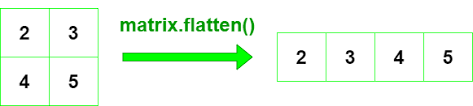

In [ ]:
article_tokens.sort_values(ascending=False).head(10) #here are the top term for the summary

film           0.303959
michael        0.258002
pop            0.218335
chronicles     0.217410
berlin         0.176567
different      0.164704
documentary    0.161972
music          0.153571
festival       0.153381
life           0.151784
dtype: float64

In [ ]:
article.body #are they similar?

'Singer George Michael has said that a new film about his life is the start of a retirement from public view.  The pop star said it would be a much more "behind the scenes affair", and called his own genre of music "dead". "I thought I should explain myself before I disappear," said Michael, who was at the Berlin film festival to launch the documentary. The film, A Different Story, chronicles Michael\'s life and career from the 1980s and his personal struggles. The 41-year-old chart-topper told reporters in the German capital that he wanted to "move his career into a different form", but added that he does not know what it is going to be yet.  "I\'m still going to be making music," he said, but added that he was "not going to be around". He hinted at discontent with the current state of music industry, and said: "I don\'t really think that there is anyone in the modern pop business who I feel I want to spar with." Michael said that the film, directed by Southan Morris, would put his tw

In [ ]:
#what if we randomly select the token in the text?
pd.Series(article.body.split()).sample(10).tolist()


['would',
 'two',
 'a',
 'highs',
 '"not',
 'form",',
 'BBC',
 'for',
 'really',
 'public']

# Classifying news articles with Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y = pd.factorize(news_df.topic)[0] #Encode the variable as categorical variable, 0='business', 1='entertainment', 2='politics', 3='sport', 4='tech'. [0] is the array [1] is the index
X = news_df.body

#train test split based on y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
#create tfidf vectors
tfidf = TfidfVectorizer(stop_words='english')
X_train_dtm = tfidf.fit_transform(X_train)
X_test_dtm = tfidf.transform(X_test)


In [ ]:
nb = MultinomialNB() #train naives bayes classifier
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
#evaluate results
accuracy_score(y_test, y_pred_class)


0.9766606822262118

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       128
           1       0.99      0.97      0.98        97
           2       0.94      0.99      0.96       104
           3       0.99      1.00      1.00       128
           4       0.98      0.95      0.96       100

    accuracy                           0.98       557
   macro avg       0.98      0.98      0.98       557
weighted avg       0.98      0.98      0.98       557



In [ ]:
#look at the confusion matrix
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred_class))


,0,1,2,3,4
0,124,0,3,0,1
1,0,94,2,0,1
2,1,0,103,0,0
3,0,0,0,128,0
4,1,1,2,1,95


In [ ]:
#look at the confusion matrix with class names
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred_class), index=pd.factorize(news_df.topic)[1],columns = pd.factorize(news_df.topic)[1] )

,business,entertainment,politics,sport,tech
business,124,0,3,0,1
entertainment,0,94,2,0,1
politics,1,0,103,0,0
sport,0,0,0,128,0
tech,1,1,2,1,95
